## Used Vehicles Analysis
* Dataset source(downloaded from Kaggle): https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
 
* In descriptic analysis, I explore which feature group(s) of vehicles such as color, year of model, size, odometer etc. have a greater impact on a vehicles' listing price, then followed with a correlation analysis of numeric varialbes(including converted numeric variables).
* In inferencial analysis, I try to find an adequate model to explain the data.
* Dependent variable: 'price': listing price on Craigslist.org.
* Explanatory variables:
  * 'year':  year of model of a vehicle.
  * 'manufacturer':  maker of a vehicle.
  * 'cylinder':  cylinder type of a vehicle.
  * 'type':  body type of a vehicle.
  * 'paint_color':  color of a vehicle.
  * 'state':  the state where the vehicle was listed.

# Part 1: Load dataset, and check data types and structures

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


In [123]:
# Load dataset:
df = pd.read_csv('vehicles.csv', header=0)

# remove white space from cell and header
df = df.apply(lambda x: x.astype(str).str.strip() if x.dtype == "object" else x)
df.columns=df.columns.str.strip()


In [124]:
# A list of vehicles' model year for sale:
df.year.unique()

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1903., 1990.,
       1965., 1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980.,
       1967., 1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934.,
       1952., 1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022.,
       1901., 1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935.,
       1918., 1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915.,
       1945., 1902., 1905., 1920., 1944., 1910., 1909.])

In [125]:
df.shape

(426880, 26)

In [126]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer          4400
title_status         0
transmission         0
VIN                  0
drive                0
size                 0
type                 0
paint_color          0
image_url            0
description          0
county          426880
state                0
lat               6549
long              6549
posting_date         0
dtype: int64

# Part 2: Dataset Preprocess

In [128]:

# drop columns that won't be useful for this analysis
df.drop(columns =['id','url','region_url','model','condition','VIN','image_url','county','transmission','title_status','size','description','posting_date'], axis=1, inplace=True)


In [129]:

# Since we are conducting an analysis for the current automobile market, setting thresholds and removing outliers are critical for building accurate analytic models.
df= df[(df.price >= 3000) & (df.price <=400000) & (df.year >=1999)& (df.year < 2022) &(df.odometer<300000) & (df.odometer>500)]


In [130]:

# Remove nan value in the cells
df=df.dropna(subset=['lat','long','drive','lat','long'])


In [131]:
# Re-check missing values:
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
cylinders       0
fuel            0
odometer        0
drive           0
type            0
paint_color     0
state           0
lat             0
long            0
dtype: int64

In [13]:

# Besides NaN values, this dataset contains empty spaces and string-'nan' in some of the cells. To remove 'nan' in those cells:

df=df[(df.year!='nan')&(df.price !='nan')&(df.manufacturer !='nan')&(df.cylinders !='nan')&(df.fuel !='nan')&(df.odometer!='nan')&(df.drive!='nan')&(df.type!='nan')&(df.paint_color!='nan')]
df.shape


(127544, 13)

In [14]:

# Change data type for year column:
df.year=df.year.astype(int)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127544 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        127544 non-null  object 
 1   price         127544 non-null  int64  
 2   year          127544 non-null  int32  
 3   manufacturer  127544 non-null  object 
 4   cylinders     127544 non-null  object 
 5   fuel          127544 non-null  object 
 6   odometer      127544 non-null  float64
 7   drive         127544 non-null  object 
 8   type          127544 non-null  object 
 9   paint_color   127544 non-null  object 
 10  state         127544 non-null  object 
 11  lat           127544 non-null  float64
 12  long          127544 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 13.1+ MB


In [16]:

# check for unique values of each column:
df.head()

,region,price,year,manufacturer,cylinders,fuel,odometer,drive,type,paint_color,state,lat,long
31,auburn,15000,2013,ford,6 cylinders,gas,128000.0,rwd,truck,black,al,32.5920,-85.518900
32,auburn,27990,2012,gmc,8 cylinders,gas,68696.0,4wd,pickup,black,al,32.5900,-85.480000
33,auburn,34590,2016,chevrolet,6 cylinders,gas,29499.0,4wd,pickup,silver,al,32.5900,-85.480000
34,auburn,35000,2019,toyota,6 cylinders,gas,43000.0,4wd,truck,grey,al,32.6013,-85.443974
35,auburn,29990,2016,chevrolet,6 cylinders,gas,17302.0,4wd,pickup,red,al,32.5900,-85.480000


# Part 3: Descriptive Statistics Analysis

In [18]:
# re-check data structure and data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127544 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        127544 non-null  object 
 1   price         127544 non-null  int64  
 2   year          127544 non-null  int32  
 3   manufacturer  127544 non-null  object 
 4   cylinders     127544 non-null  object 
 5   fuel          127544 non-null  object 
 6   odometer      127544 non-null  float64
 7   drive         127544 non-null  object 
 8   type          127544 non-null  object 
 9   paint_color   127544 non-null  object 
 10  state         127544 non-null  object 
 11  lat           127544 non-null  float64
 12  long          127544 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 13.1+ MB


In [19]:

# re-check statistical summary:
df.describe()


,price,year,odometer,lat,long
count,127544.000000,127544.000000,127544.00000,127544.000000,127544.000000
mean,18573.311100,2012.275630,98720.30239,38.639526,-94.429466
std,13709.689435,4.959102,58023.76781,6.028843,18.511061
min,3000.000000,1999.000000,501.00000,-81.838232,-159.719900
25%,7995.000000,2009.000000,50958.00000,34.940873,-110.874594
50%,14591.000000,2013.000000,96732.00000,39.444084,-88.126209
75%,26750.000000,2016.000000,138238.00000,42.430229,-80.565300
max,289995.000000,2021.000000,299776.00000,82.252826,139.691700


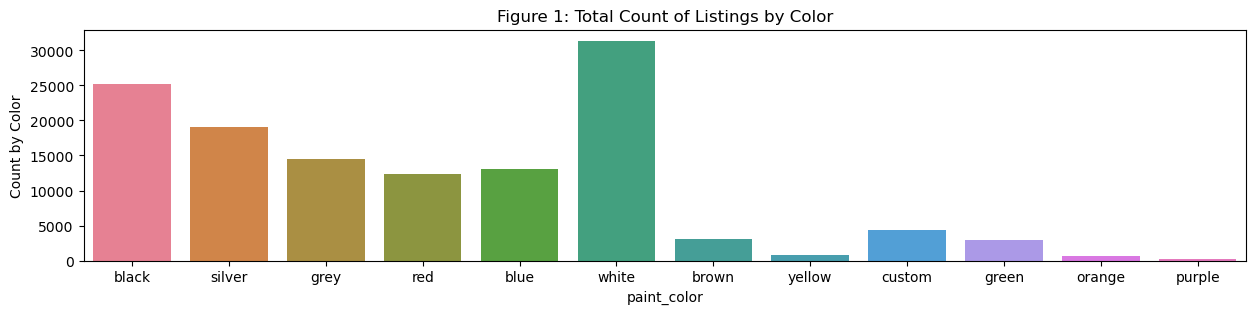

In [20]:

# color:
plt.figure(figsize=(15,3))
sns.countplot(data=df, x='paint_color', hue='paint_color')
plt.title('Figure 1: Total Count of Listings by Color')
plt.ylabel('Count by Color')
plt.show()

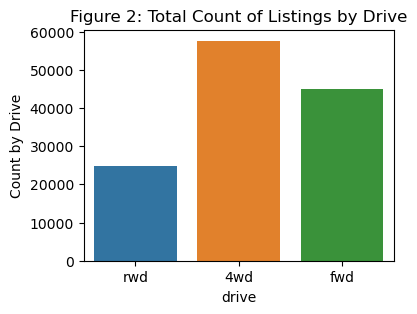

In [21]:

# drive:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='drive', hue='drive')
plt.title('Figure 2: Total Count of Listings by Drive')
plt.ylabel('Count by Drive')
plt.show()

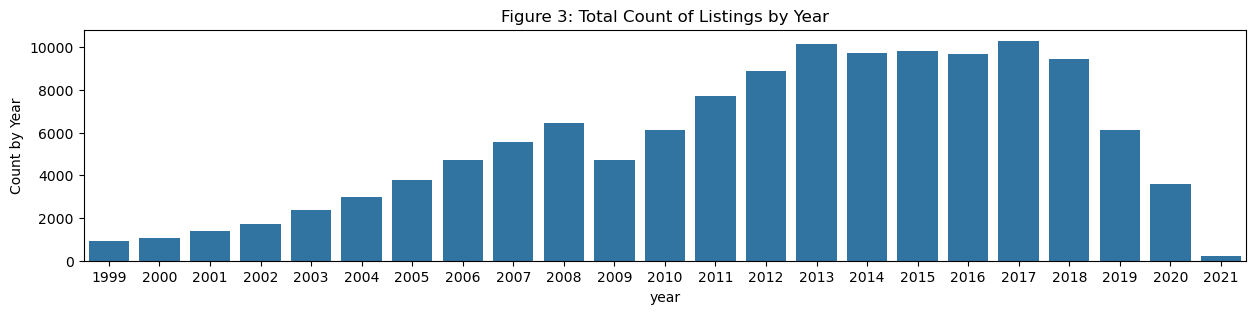

In [22]:

# 
plt.figure(figsize=(15,3))
sns.countplot(data=df, x='year')
plt.title('Figure 3: Total Count of Listings by Year')
plt.ylabel('Count by Year')
plt.show()

In [156]:

# save the file to a csv file after cleaning for further visulization analysis using Tableau.
df.to_csv('vehicles_clean.csv', index= False)


#### Part 3 conclusions: 
* White color of vehicle has the most number of listings, 4wd - Four wheel drive is the most popular drive type, followed by fwd - front wheel drive)

# Part 4: Correlation Analysis

##### In order to find out whether there are correlations between price and other non-numerical variables such as drive, color, cylinders, we will need to replace categorical name to numurical numbers for the pupose of correlation analysis.

* To replace categorical names to numerical numbers, for example:

       drive['rwd', '4wd','fwd'] -- replaced with -- drive_n [1, 3, 2]
      

In [27]:
dfn=pd.read_csv('vehicles_clean.csv', header=0)

In [28]:
dfn.head()

,region,price,year,manufacturer,cylinders,fuel,odometer,drive,type,paint_color,state,lat,long
0,auburn,15000,2013,ford,6 cylinders,gas,128000.0,rwd,truck,black,al,32.5920,-85.518900
1,auburn,27990,2012,gmc,8 cylinders,gas,68696.0,4wd,pickup,black,al,32.5900,-85.480000
2,auburn,34590,2016,chevrolet,6 cylinders,gas,29499.0,4wd,pickup,silver,al,32.5900,-85.480000
3,auburn,35000,2019,toyota,6 cylinders,gas,43000.0,4wd,truck,grey,al,32.6013,-85.443974
4,auburn,29990,2016,chevrolet,6 cylinders,gas,17302.0,4wd,pickup,red,al,32.5900,-85.480000


In [29]:
dfn.dtypes

region           object
price             int64
year              int64
manufacturer     object
cylinders        object
fuel             object
odometer        float64
drive            object
type             object
paint_color      object
state            object
lat             float64
long            float64
dtype: object

In [163]:
dfn.describe()

,price,year,cylinders,odometer,drive,lat,long,age
count,127544.000000,127544.000000,127544.000000,127544.00000,127544.000000,127544.000000,127544.000000,127544.000000
mean,18573.311100,2012.275630,5.916256,98720.30239,2.256570,38.639526,-94.429466,9.724370
std,13709.689435,4.959102,1.658722,58023.76781,0.762324,6.028843,18.511061,4.959102
min,3000.000000,1999.000000,3.000000,501.00000,1.000000,-81.838232,-159.719900,1.000000
25%,7995.000000,2009.000000,4.000000,50958.00000,2.000000,34.940873,-110.874594,6.000000
50%,14591.000000,2013.000000,6.000000,96732.00000,2.000000,39.444084,-88.126209,9.000000
75%,26750.000000,2016.000000,8.000000,138238.00000,3.000000,42.430229,-80.565300,13.000000
max,289995.000000,2021.000000,13.000000,299776.00000,3.000000,82.252826,139.691700,23.000000


In [30]:
dfn['cylinders'] = dfn['cylinders'].astype(str)
dfn['cylinders'] = dfn['cylinders'].str.replace(' cylinders', '', regex=False)
dfn['cylinders'] = dfn['cylinders'].str.replace('other', '13', regex=False)
dfn['cylinders'] = dfn['cylinders'].astype(int)
dfn.cylinders.unique()

array([ 6,  8,  4,  5, 10,  3, 13, 12])

In [31]:
dfn['age'] = 2022 - dfn['year'] 
dfn.age.unique()


array([ 9, 10,  6,  3, 11,  5,  4, 18, 21,  8, 19, 14, 15,  2, 16, 17, 12,
       13, 20, 23,  7,  1, 22], dtype=int64)

In [32]:
# Ensure 'drive' is a string column
dfn['drive'] = dfn['drive'].astype(str)

# Replace the values using a dictionary
dfn['drive'] = dfn['drive'].replace({'rwd': '1', '4wd': '3', 'fwd': '2'})

# Convert 'drive' back to integer
dfn['drive'] = dfn['drive'].astype(int)

# Check the unique values in the 'drive' column
print(dfn['drive'].unique())


[1 3 2]


In [33]:
dfn=dfn.dropna()

In [34]:
dfn.to_csv('clean.csv')

## EDA

In [109]:
dfn.head()

,region,price,year,manufacturer,cylinders,fuel,odometer,drive,type,paint_color,state,lat,long,age
0,auburn,15000,2013,ford,6,gas,128000.0,1,truck,black,al,32.5920,-85.518900,9
1,auburn,27990,2012,gmc,8,gas,68696.0,3,pickup,black,al,32.5900,-85.480000,10
2,auburn,34590,2016,chevrolet,6,gas,29499.0,3,pickup,silver,al,32.5900,-85.480000,6
3,auburn,35000,2019,toyota,6,gas,43000.0,3,truck,grey,al,32.6013,-85.443974,3
4,auburn,29990,2016,chevrolet,6,gas,17302.0,3,pickup,red,al,32.5900,-85.480000,6


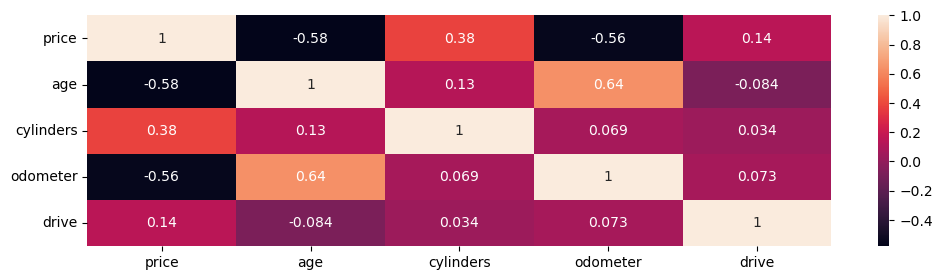

In [140]:
# Create a heatmap to visulize the correlations:
corr = dfn[['price','age','cylinders','odometer','drive']]
plt.figure(figsize=(12,3))
sns.heatmap(corr.corr(), annot=True)
#plt.title('Figure 4: Correlation Heatmap')
plt.show()

#### Part 4 conclusion:
* Correlation analysis suggested:
  
  * a negative linear relationship between price(the dependent variable) and the explanatory variables: odometer, age.

  * a positive linear relationship between price and cylinders and drive.

# Part 5: Inferential analysis:


In [142]:
model1 = smf.ols("price ~ odometer", data=dfn).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                 5.724e+04
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:57:31   Log-Likelihood:            -1.3723e+06
No. Observations:              127544   AIC:                         2.745e+06
Df Residuals:                  127542   BIC:                         2.745e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.156e+04     62.941    501.352      0.0

In [144]:
model2 = smf.ols("price ~ age", data=dfn).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                 6.498e+04
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:57:35   Log-Likelihood:            -1.3697e+06
No. Observations:              127544   AIC:                         2.739e+06
Df Residuals:                  127542   BIC:                         2.739e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.419e+04     68.777    497.141      0.0

In [153]:
model3 = smf.ols('price ~ age + odometer + drive + cylinders', data=dfn).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 5.072e+04
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:00:01   Log-Likelihood:            -1.3352e+06
No. Observations:              127544   AIC:                         2.670e+06
Df Residuals:                  127539   BIC:                         2.671e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.068e+04    119.183     89.599      0.0

## Part 5 conclusions:
* r2 for 3 models:
  * model 1: 0.310
  * model 2: 0.338
  * model 3: 0.614

* Since model 3 has a highest R squared value (0.614), meaning it can explain the dependence variable better compared to other models.
      

# Concluding remarks:
* Describe data analysis shows pupular features include: white color vehicles, four wheel drive and followed by front wheel drive.
* Correlation analysis suggested a weak positive correlation between price and drive type, a negative correlation between price and age and odometer.
* Model 3 (odometer + age + cylinders + drive) is the best model, with a R squared of 0.614, meaning the combination of odometer  + age + cylinders + drive can explain 61.4% variance in the listings price.